<a href="https://colab.research.google.com/github/020/020.github.io/blob/master/21_12_22_Presentations_LSTM_Exp_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import LSTM
from keras.models import load_model
import keras
import h5py
import requests
import os
import tensorflow as tf

<ipython-input-1-ae4bf24cd82b>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
data_df =  pd.read_csv('/content/ed_presentations_from_aug2020.csv', index_col = 0)
data_df.head()

,y
ds,
01/08/2020,2844
02/08/2020,2973
03/08/2020,3176
04/08/2020,2888
05/08/2020,2870


In [3]:
data_df.shape

(838, 1)

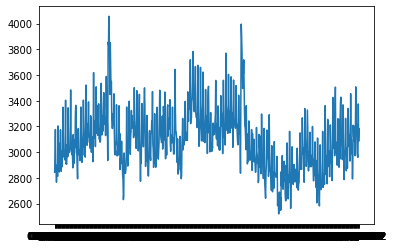

In [4]:
plt.plot(data_df['y'])
plt.show()

In [5]:
data_df['ds'] = data_df.index
data_df.head()

,y,ds
ds,,
01/08/2020,2844,01/08/2020
02/08/2020,2973,02/08/2020
03/08/2020,3176,03/08/2020
04/08/2020,2888,04/08/2020
05/08/2020,2870,05/08/2020


In [6]:
data_df['ds'] = pd.to_datetime(data_df['ds'])

In [7]:
data_df.head()

,y,ds
ds,,
01/08/2020,2844,2020-01-08
02/08/2020,2973,2020-02-08
03/08/2020,3176,2020-03-08
04/08/2020,2888,2020-04-08
05/08/2020,2870,2020-05-08


In [8]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset = min_max_scaler.fit_transform(data_df['y'].values.reshape(-1, 1))

In [9]:
dataset[0:10]

array([[0.21080026],
       [0.29472999],
       [0.42680547],
       [0.23942746],
       [0.22771633],
       [0.16070267],
       [0.23227066],
       [0.24788549],
       [0.18998048],
       [0.44502277]])

In [10]:
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

586 252


In [11]:
print(len(data_df))
print(586 + 252)

838
838


In [12]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=15):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [13]:
x_train, y_train = create_dataset(train, look_back=15)
x_test, y_test = create_dataset(test, look_back=15)

In [14]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(570, 15)
(570,)
(236, 15)
(236,)


In [15]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(570, 1, 15)
(570,)
(236, 1, 15)
(236,)


In [20]:
look_back = 15
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(x_train, y_train, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
570/570 - 3s - loss: 0.0171 - 3s/epoch - 5ms/step
Epoch 2/50
570/570 - 1s - loss: 0.0104 - 1s/epoch - 2ms/step
Epoch 3/50
570/570 - 1s - loss: 0.0091 - 1s/epoch - 2ms/step
Epoch 4/50
570/570 - 1s - loss: 0.0084 - 1s/epoch - 2ms/step
Epoch 5/50
570/570 - 1s - loss: 0.0080 - 1s/epoch - 2ms/step
Epoch 6/50
570/570 - 1s - loss: 0.0079 - 1s/epoch - 2ms/step
Epoch 7/50
570/570 - 1s - loss: 0.0078 - 1s/epoch - 2ms/step
Epoch 8/50
570/570 - 1s - loss: 0.0074 - 1s/epoch - 2ms/step
Epoch 9/50
570/570 - 1s - loss: 0.0073 - 1s/epoch - 2ms/step
Epoch 10/50
570/570 - 1s - loss: 0.0075 - 1s/epoch - 2ms/step
Epoch 11/50
570/570 - 1s - loss: 0.0071 - 1s/epoch - 2ms/step
Epoch 12/50
570/570 - 1s - loss: 0.0070 - 1s/epoch - 2ms/step
Epoch 13/50
570/570 - 1s - loss: 0.0072 - 1s/epoch - 2ms/step
Epoch 14/50
570/570 - 1s - loss: 0.0072 - 1s/epoch - 2ms/step
Epoch 15/50
570/570 - 1s - loss: 0.0071 - 1s/epoch - 2ms/step
Epoch 16/50
570/570 - 1s - loss: 0.0073 - 1s/epoch - 2ms/step
Epoch 17/50
570/5

In [21]:
history.history

print("Evaluate model on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate model on test data
2/2 [==============================] - 1s 7ms/step - loss: 0.0049
test loss, test acc: 0.004897431004792452


In [18]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# invert predictions
trainPredict = min_max_scaler.inverse_transform(trainPredict)
trainY = min_max_scaler.inverse_transform([y_train])
testPredict = min_max_scaler.inverse_transform(testPredict)
testY = min_max_scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

trainScore = tf.keras.metrics.mean_absolute_percentage_error(trainY[0], trainPredict[:,0])
print('Train Score: %.2f MAPE' % (trainScore))
testScore = tf.keras.metrics.mean_absolute_percentage_error(testY[0], testPredict[:,0])
print('Test Score: %.2f MAPE' % (testScore))

8/8 [==============================] - 0s 3ms/step
Train Score: 120.77 RMSE
Test Score: 103.28 RMSE
Train Score: 2.80 MAPE
Test Score: 2.80 MAPE


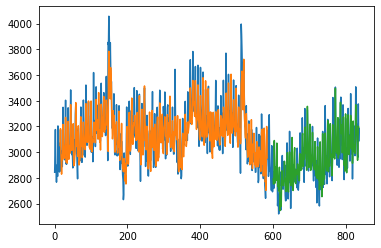

In [19]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(min_max_scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [31]:
# Generate a prediction using model.predict() 
# and calculate it's shape:
print("Generate a prediction")
prediction = model.predict(x_test[:7])
print("prediction shape:", prediction.shape)
prediction[0:7]

Generate a prediction
1/1 [==============================] - 0s 44ms/step
prediction shape: (7, 1)


array([[0.18331844],
       [0.16009235],
       [0.19429235],
       [0.37899047],
       [0.27784485],
       [0.16936202],
       [0.19134206]], dtype=float32)

In [27]:

min_max_scaler.inverse_transform(prediction)

array([[2801.7603],
       [2766.062 ],
       [2818.6272],
       [3102.5083],
       [2947.0474],
       [2780.3093],
       [2814.0928]], dtype=float32)